In [20]:
import pandas as pd
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
# read in data
training = pd.read_csv("all/training.csv")

In [22]:
training.shape

(7049, 31)

In [23]:
training.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [24]:
# shuffle dataset for training/validation split later
shuffle = np.random.permutation(np.arange(training.shape[0]))
training = training.iloc[shuffle].reset_index(drop=True)

In [25]:
# split out image values
image = []
for i in range(training.shape[0]):
    img = training['Image'][i].split(' ')
    img = ['0' if j == '' else j for j in img]
    image.append(img)

In [45]:
# create training and validation set (80/20 split)
X = np.array(image, dtype = 'float')
X_train, X_val = X[:5640], X[5640:]
print(X_train.shape, X_val.shape)

(5640, 9216) (1409, 9216)


In [46]:
# create training and validation labels (80/20 split)
labels = training.drop('Image', axis=1)
y = np.array(labels, dtype = 'float')
y_train, y_val = y[:5640], y[5640:]
print(y_train.shape, y_val.shape)

(5640, 30) (1409, 30)


In [47]:
# remove missing labels for now
X_train_nm = X_train[~np.isnan(y_train).any(axis=1)]
y_train_nm = y_train[~np.isnan(y_train).any(axis=1)]
X_val_nm = X_val[~np.isnan(y_val).any(axis=1)]
y_val_nm = y_val[~np.isnan(y_val).any(axis=1)]
print(X_train_nm.shape)
print(y_train_nm.shape)
print(X_val_nm.shape)
print(y_val_nm.shape)

(1712, 9216)
(1712, 30)
(428, 9216)
(428, 30)


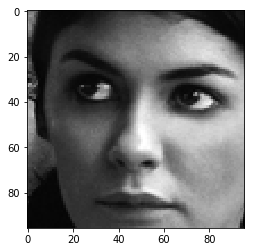

In [35]:
# show image
plt.imshow(X_train[666].reshape(96,96),cmap='gray')
plt.show()

## Baseline: Single Layer CNN with 10 Filters

In [48]:
# reshape data for CNN input
X_train_nm = X_train_nm.reshape(-1,96,96,1)
X_val_nm = X_val_nm.reshape(-1,96,96,1)

In [49]:
# Single Layer CNN

# create model
model = Sequential()
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(96,96,1), data_format='channels_last'))
model.add(Flatten())
model.add(Dense(30))

# define RMSE
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# compile model
model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'mae', 'mape'])

# fit model
%time history_cnn = model.fit(X_train_nm, y_train_nm, epochs=1, shuffle=True, batch_size=32, validation_data=(X_val_nm, y_val_nm), verbose=2)


Train on 1712 samples, validate on 428 samples
Epoch 1/1
 - 5s - loss: 49.5770 - rmse: 49.5770 - mean_absolute_error: 42.8406 - mean_absolute_percentage_error: 100.4431 - val_loss: 11.8179 - val_rmse: 11.8179 - val_mean_absolute_error: 8.7144 - val_mean_absolute_percentage_error: 18.8922
CPU times: user 21.5 s, sys: 737 ms, total: 22.2 s
Wall time: 5.51 s


In [ ]:
# plot metrics
plt.plot(history_cnn.history['rmse'])
plt.plot(history_cnn.history['val_rmse'])
plt.show()

In [ ]:
# look at final RMSE value after 10 epochs
print(history_cnn.history.get('val_rmse')[-1])
print(history_cnn.history.get('rmse')[-1])